# pygameのインストール

以下のサイトを参考にした。

http://florian-berger.de/en/articles/installing-pygame-for-python-3-on-os-x/

mercurialというバージョン管理システムが必要らしい。Macの場合は、Brewで入れられると思う。

    brew install mercurial

mercurialはインストールに必要なだけで、pygameの動作とは関係ない。   

Anacondaでは、EnvironmentsからOpen Terminalし、Terminalで作業する。

    pip install hg+http://bitbucket.org/pygame/pygame


## 既知の問題
1. pygameをinline実行するためのおまじないがない。
2. key割り込みをJupyterがひろってしまうため、keyによる操作ができない。

まだまだ使いにくい。processingのほうが良い気がする。

In [1]:
import pygame

In [ ]:
#! /usr/bin/env python

import pygame
from pygame.locals import *
screen=pygame.display.set_mode((400,400),0,24)
white = Color(0)
white.hsva = (0,0,100,100)
col = Color(0)

screen.fill(white)
hue = 0
while True:
    pygame.event.get()
    x,y = pygame.mouse.get_pos()
    pressed = pygame.key.get_pressed()
    if pressed[K_q]:
        break
    col.hsva = (hue,100,100,10)
    pygame.draw.circle(screen, col, (x,y), 100, 3)
    hue += 1
    if hue >= 360:
        hue -= 360
    pygame.display.flip()
    pygame.time.wait(10)


以下はMatPlotLibでアニメーションする例だが、interactiveではない。やはり無理か。

無理なのであれば、エラーなしにpygameを停止する方法を見付けることで妥協する。

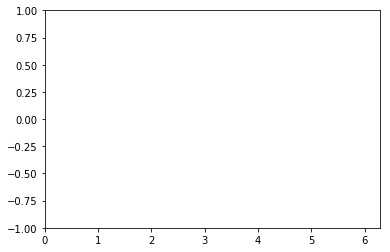

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
HTML(ani.to_jshtml())

## うまくいかなかったケース

以下のページを参考に試す。
https://stackoverflow.com/questions/19636480/installation-of-pygame-with-anaconda
AnacondaでOpen Terminalし、以下のコマンドを入力。

    conda install -c tlatorre pygame

だめでした。別のコメントに従い、

    conda install -c cogsci pygame=1.9.2a0

ではどうか。これだとpython 3.5にダウングレードされてしまう。はじめからpython 3.5のenvironmentを準備するのが良さそう。

pipで入れろという説もある。